In [1]:
import pickle
import pathlib

import sys
sys.path.append('../src/')

import matplotlib.pyplot as plt
import matplotlib

In [2]:
result_path_str = pathlib.Path('results')
bagged_MLP_path = result_path_str / "SKlearn_baggedTree_over_n_members_text_MCCELoss.pkl"
with open(bagged_MLP_path, 'rb') as f:
    bagged_MLP_result = pickle.load(f)

In [3]:
bagged_tree_path = result_path_str / "SKlearn_baggedTree_over_n_members_cancer_BCELoss.pkl"
with open(bagged_tree_path, 'rb') as f:
    bagged_tree_result = pickle.load(f)

In [4]:
abalone_regression_path = result_path_str / "Abalone_Bagged_Tree_Regression.pkl"
with open(abalone_regression_path, 'rb') as f:
    abalone_regression_result = pickle.load(f)

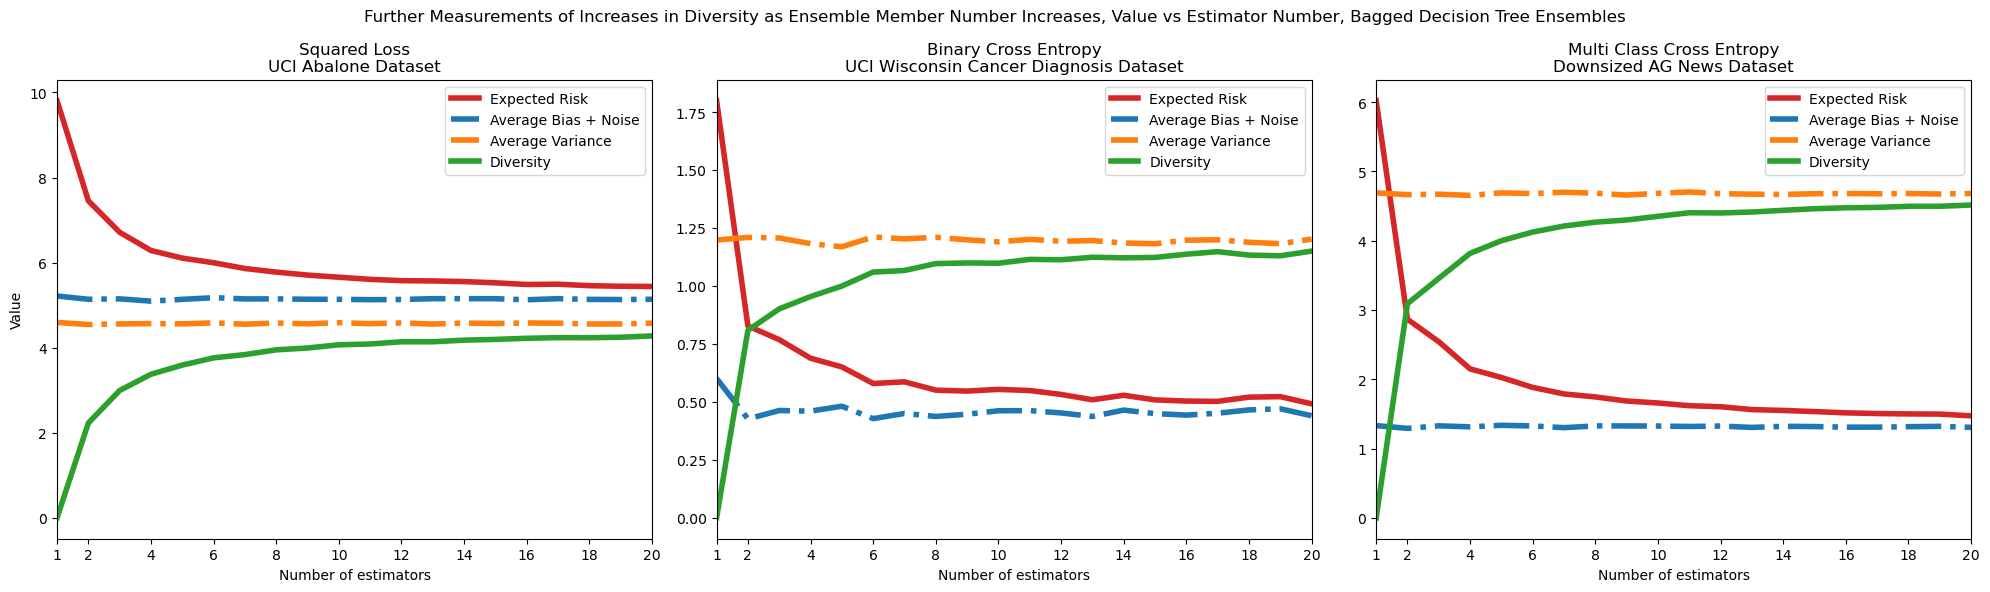

In [5]:
xvals = abalone_regression_result.parameter_values

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(20,6))

axs = [ax1, ax2, ax3]
results = [abalone_regression_result, bagged_tree_result, bagged_MLP_result]

ax1.set_title("Squared Loss\nUCI Abalone Dataset")
ax2.set_title("Binary Cross Entropy\nUCI Wisconsin Cancer Diagnosis Dataset")
ax3.set_title("Multi Class Cross Entropy\nDownsized AG News Dataset")

linewidth = 4

for i, ax in enumerate(axs):
    result = results[i]
    ax.plot(xvals, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(xvals, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(xvals, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(xvals, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Number of estimators")

    ax.legend()

fig.suptitle("Further Measurements of Increases in Diversity as Ensemble Member Number Increases, Value vs Estimator Number, Bagged Decision Tree Ensembles")

even_vals = [1] + [x for x in xvals if x % 2 == 0]
ax1.set_xticks(even_vals)
ax1.set_xlim(1,20)
ax1.set_ylabel("Value")

# plt.legend()
plt.tight_layout()
plt.savefig("plot_different_loss_member_vs_diversity.svg")
plt.show()


In [13]:
import numpy as np
matplotlib.rc('font', size=24)

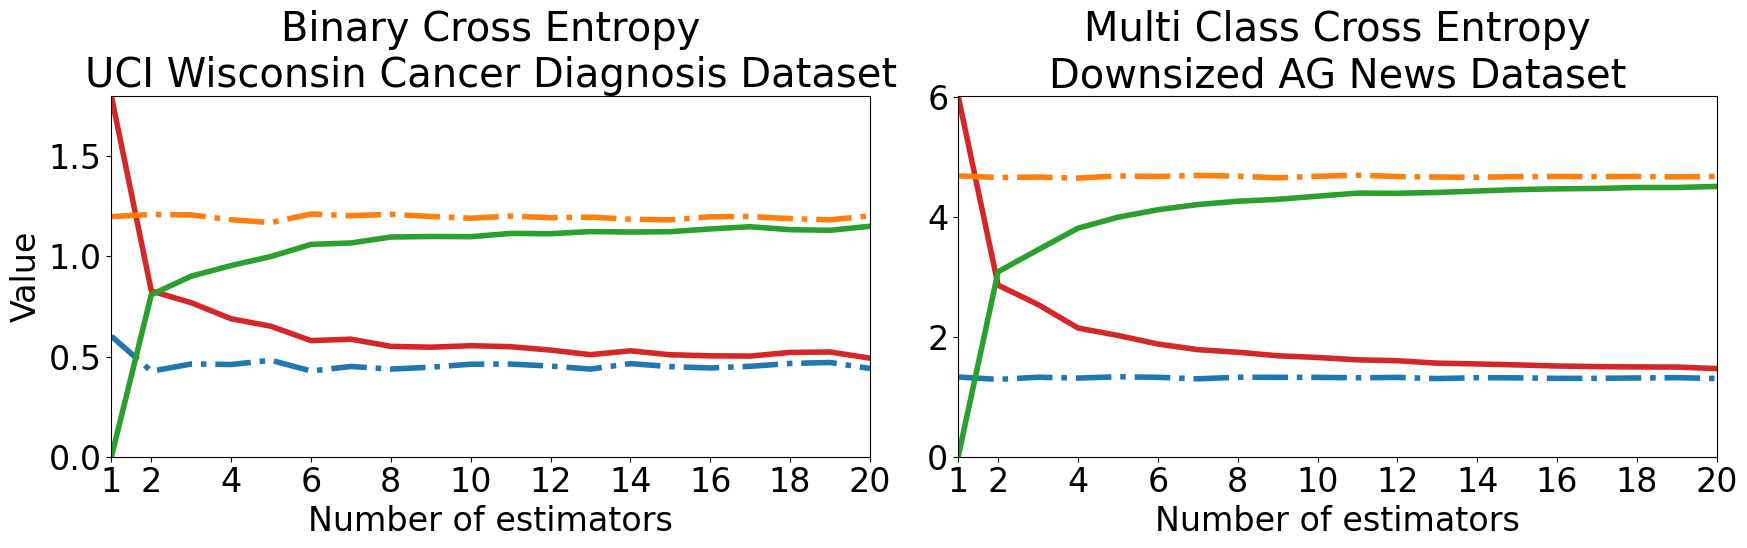

In [18]:
xvals = abalone_regression_result.parameter_values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))


axs = [ax1, ax2]
results = [bagged_tree_result, bagged_MLP_result]

ax1.set_title("Binary Cross Entropy\nUCI Wisconsin Cancer Diagnosis Dataset")
ax2.set_title("Multi Class Cross Entropy\nDownsized AG News Dataset")

linewidth = 4

for i, ax in enumerate(axs):
    result = results[i]
    ax.plot(result.parameter_values, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    ax.plot(result.parameter_values, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    ax.plot(result.parameter_values, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    ax.set_xlabel("Number of estimators")

    even_vals = [1] + [x for x in result.parameter_values if x % 2 == 0]
    ax.set_xticks(even_vals)
    ax.set_xlim(1,np.max(even_vals))
    if i == 1:
        p = 1

# fig.suptitle("Sqaured Loss Bias-Variance-Diversity Decompositions Varying Members for Winequality Dataset Regression")

ax1.set_ylabel("Value")
ax1.set_ylim(0, np.max(bagged_tree_result.ensemble_risk))
ax2.set_ylim(0, np.max(bagged_MLP_result.ensemble_risk))

# plt.legend()
plt.tight_layout()
plt.savefig("plot_diff_loss_member_vs_diversity_TWO.svg")
plt.show()

ticks = ax1.get_yticks()


/tmp/ipykernel_8581/3885687695.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


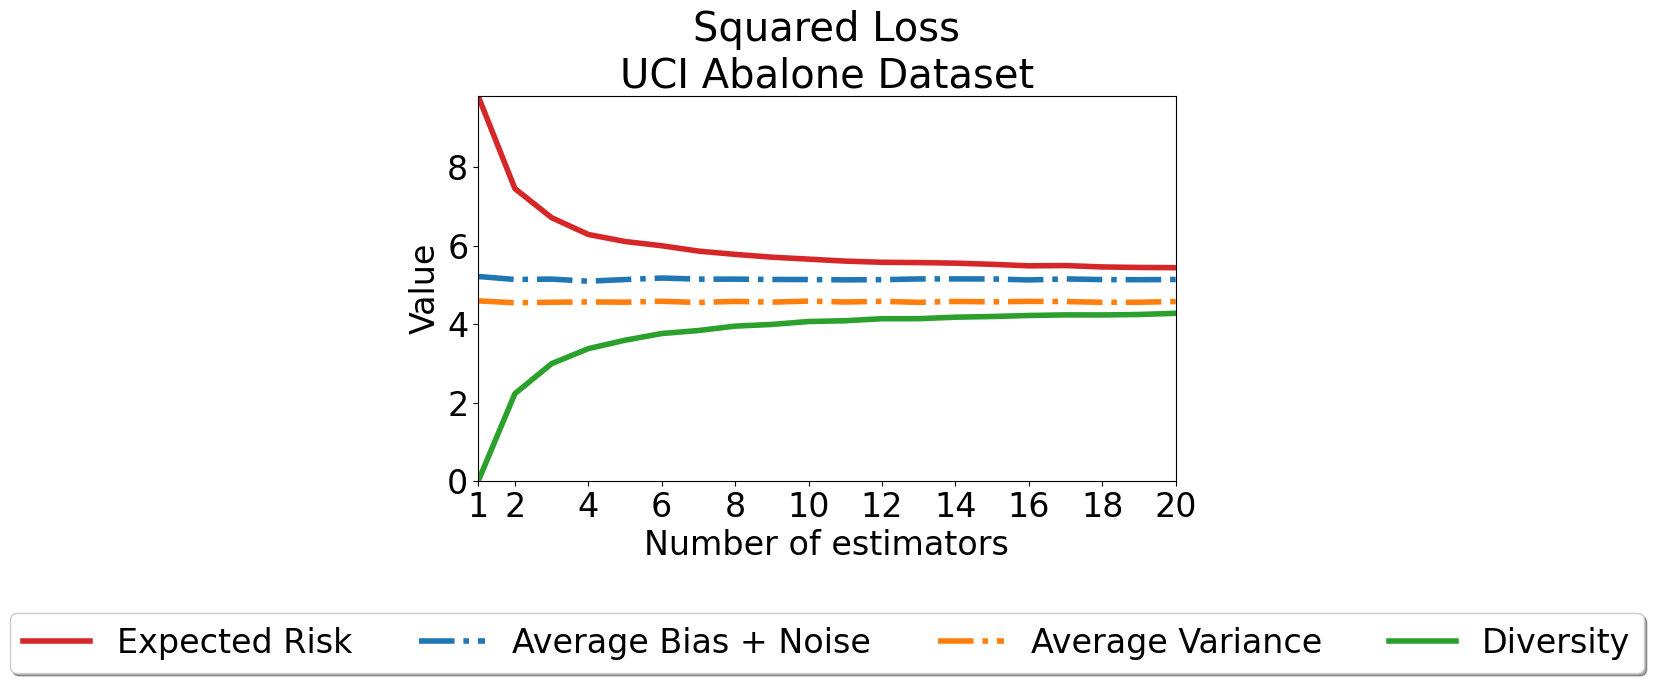

In [19]:
xvals = abalone_regression_result.parameter_values

fig, ax = plt.subplots(figsize=(9,5))

results = [abalone_regression_result]

plt.title("Squared Loss\nUCI Abalone Dataset")

linewidth = 4
for result in results:
    plt.plot(result.parameter_values, result.ensemble_risk, label="Expected Risk", color='tab:red', linewidth=linewidth)
    plt.plot(result.parameter_values, result.average_bias, label="Average Bias + Noise", linestyle="dashdot", color='tab:blue', linewidth=linewidth)
    plt.plot(result.parameter_values, result.average_variance, label="Average Variance", linestyle="dashdot", color='tab:orange', linewidth=linewidth)
    plt.plot(result.parameter_values, result.diversity, label="Diversity", color='tab:green', linewidth=linewidth)

    plt.xlabel("Number of estimators")

    even_vals = [1] + [x for x in result.parameter_values if x % 2 == 0]
    ax.set_xticks(even_vals)
    ax.set_xlim(1,np.max(even_vals))
    if i == 2:
        ax.legend(framealpha=0.6)

# fig.suptitle("Sqaured Loss Bias-Variance-Diversity Decompositions Varying Members for Winequality Dataset Regression")

plt.ylabel("Value")
plt.ylim(0, np.max(abalone_regression_result.ensemble_risk))
# plt.yticks([0, 0.2, 0.4, 0.6, 0.8])




plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=4)

plt.tight_layout()
plt.savefig("plot_diff_loss_member_vs_diversity_ONE.svg", bbox_inches='tight')
plt.show()